In [1]:
#import the proper libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
#build the data frame
suicide_frame = pd.read_csv('master.csv')
suicide_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [3]:
#lets drop 2016 because most countries do not have this year recorded
suicide_frame_clean=suicide_frame[suicide_frame['year'] != 2016]
#lets also drop some columns we won't be using
suicide_frame_clean = suicide_frame_clean.drop(['HDI for year', 'generation'], axis = 1)
suicide_frame_clean.info()
suicide_frame_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8    gdp_for_year ($)   27660 non-null  object 
 9   gdp_per_capita ($)  27660 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796


In [4]:
#Hypothesis 2: Lets look at the suicide rate per 100k pop for the age range 15-24
teens_1990 =suicide_frame_clean[suicide_frame_clean['age']=='15-24 years'][suicide_frame_clean['year']==1990]
teens_1990.info()
teens_2010 = suicide_frame_clean[suicide_frame_clean['age']=='15-24 years'][suicide_frame_clean['year']==2010]
teens_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 325 to 27564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             128 non-null    object 
 1   year                128 non-null    int64  
 2   sex                 128 non-null    object 
 3   age                 128 non-null    object 
 4   suicides_no         128 non-null    int64  
 5   population          128 non-null    int64  
 6   suicides/100k pop   128 non-null    float64
 7   country-year        128 non-null    object 
 8    gdp_for_year ($)   128 non-null    object 
 9   gdp_per_capita ($)  128 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 11.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 256 to 27764
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             176 non-

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


DescribeResult(nobs=128, minmax=(0.0, 50.89), mean=9.115156249999998, variance=84.53540312500002, skewness=1.8964333177534842, kurtosis=4.615414658680549)
DescribeResult(nobs=176, minmax=(0.0, 40.82), mean=7.973750000000001, variance=76.37093557142856, skewness=1.7481297708036412, kurtosis=2.8847404261322662)
(0.8171765804290771, 2.5256239807869285e-11)
(0.8001545071601868, 3.023125302067768e-14)


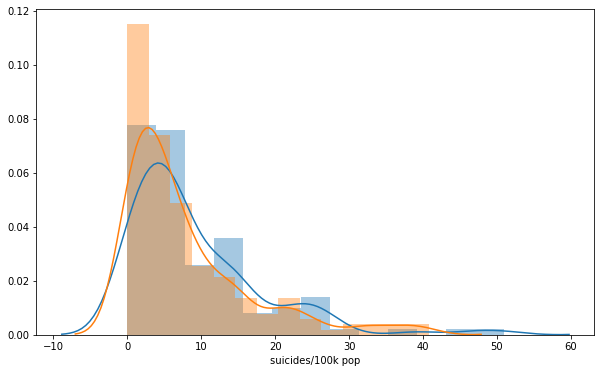

In [5]:
plt.figure(figsize = (10,6))
sns.distplot(teens_1990['suicides/100k pop'])
sns.distplot(teens_2010['suicides/100k pop'])

print(stats.describe(teens_1990['suicides/100k pop']))
print(stats.describe(teens_2010['suicides/100k pop']))

print(stats.shapiro(teens_1990['suicides/100k pop']))
print(stats.shapiro(teens_2010['suicides/100k pop']))

#visually this is not normally distributed The skewness and 
#kurtosis are not close to zero. The results of the Shapiro-Wilk's
#test indicate that these are not normally distributed.

In [6]:
#Since the data sets are not normally distributed, lets run a 
#Kuskal-Wallis test to see if they are significantly different from one another.
stats.kruskal(teens_1990['suicides/100k pop'], teens_2010['suicides/100k pop'])

KruskalResult(statistic=2.4683136176426177, pvalue=0.11616249680017487)

In [7]:
#we need to manipulate the dataframe to get overall suicide rate and GDP and GDP per capita for
suicides_2015 = suicide_frame_clean[suicide_frame_clean['year'] == 2015]
suicides_2015.info()
#drop rows we don't need
suicides_2015 = suicides_2015.drop(['year', 'age', 'sex', 'suicides/100k pop', 'country-year'], axis = 1)
suicides_2015.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 576 to 27555
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             744 non-null    object 
 1   year                744 non-null    int64  
 2   sex                 744 non-null    object 
 3   age                 744 non-null    object 
 4   suicides_no         744 non-null    int64  
 5   population          744 non-null    int64  
 6   suicides/100k pop   744 non-null    float64
 7   country-year        744 non-null    object 
 8    gdp_for_year ($)   744 non-null    object 
 9   gdp_per_capita ($)  744 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 63.9+ KB


,country,suicides_no,population,gdp_for_year ($),gdp_per_capita ($)
576,Antigua and Barbuda,1,6403,"1,364,863,037",14853
577,Antigua and Barbuda,0,8561,"1,364,863,037",14853
578,Antigua and Barbuda,0,7740,"1,364,863,037",14853
579,Antigua and Barbuda,0,15323,"1,364,863,037",14853
580,Antigua and Barbuda,0,8239,"1,364,863,037",14853
581,Antigua and Barbuda,0,1724,"1,364,863,037",14853
582,Antigua and Barbuda,0,8331,"1,364,863,037",14853
583,Antigua and Barbuda,0,7059,"1,364,863,037",14853
584,Antigua and Barbuda,0,13370,"1,364,863,037",14853
585,Antigua and Barbuda,0,8268,"1,364,863,037",14853


In [8]:
suicide_no_2015 = suicides_2015.groupby('country')['suicides_no'].sum()
print(suicide_no_2015.head()) #get total suicides per country
population_2015 = suicides_2015.groupby('country')['population'].sum()
print(population_2015.head()) #get total population per country

country
Antigua and Barbuda       1
Argentina              3073
Armenia                  74
Australia              3027
Austria                1251
Name: suicides_no, dtype: int64
country
Antigua and Barbuda       91889
Argentina              39699624
Armenia                 2795335
Australia              22240785
Austria                 8219386
Name: population, dtype: int64


In [9]:
#get the GDP per country
gdps = suicides_2015.groupby('country')[' gdp_for_year ($) '].max()
gdps_numeric = gdps.apply(lambda x: x.replace(",",""))
gdps_numeric_new=pd.to_numeric(gdps_numeric)
print(gdps_numeric_new.head())

country
Antigua and Barbuda       1364863037
Argentina               594749285413
Armenia                  10553337673
Australia              1349034029453
Austria                 382065930308
Name:  gdp_for_year ($) , dtype: int64


In [10]:
#build modified data frame
suicides_2015_modified = pd.merge( suicide_no_2015, population_2015, on='country')
suicides_2015_modified = suicides_2015_modified.assign(suicide_rate = (suicides_2015_modified.suicides_no/suicides_2015_modified.population)*100000)
suicides_2015_modified = pd.merge(suicides_2015_modified, gdps_numeric_new, on='country')
suicides_2015_modified=suicides_2015_modified.rename(columns={' gdp_for_year ($) ':'GDP'})
suicides_2015_modified = suicides_2015_modified.assign(GDP_per_capita = (suicides_2015_modified.GDP/suicides_2015_modified.population))
print(suicides_2015_modified.head(10))

                     suicides_no  population  suicide_rate            GDP  \
country                                                                     
Antigua and Barbuda            1       91889      1.088270     1364863037   
Argentina                   3073    39699624      7.740627   594749285413   
Armenia                       74     2795335      2.647268    10553337673   
Australia                   3027    22240785     13.610131  1349034029453   
Austria                     1251     8219386     15.220115   382065930308   
Belgium                     1867    10624356     17.572830   455039563133   
Belize                        26      319835      8.129192     1778567600   
Brazil                     11163   191087085      5.841839  1802214373741   
Chile                       1838    16565725     11.095198   243999477738   
Colombia                    2332    44490427      5.241577   291519591533   

                     GDP_per_capita  
country                              

The correlation coefficient between suicide rate and GDP is (0.11474669571988942, 0.37450461034847354)


Text(0.5, 1.0, 'GDP versus Suicide Rate')

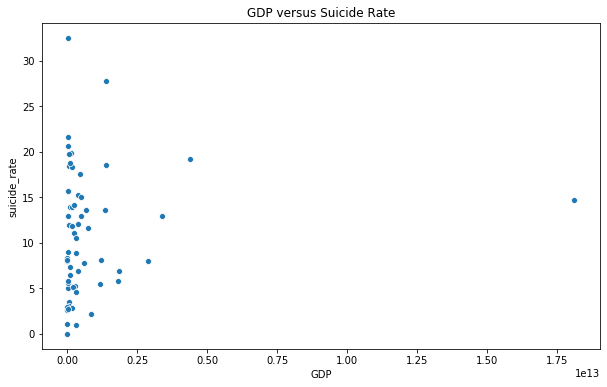

In [11]:
#Lets see if there is a correlation between suicide rate and GDP

pearsonr_GDP = stats.pearsonr(suicides_2015_modified['suicide_rate'], suicides_2015_modified['GDP'])
print("The correlation coefficient between suicide rate and GDP is {}".format(pearsonr_GDP))
plt.figure(figsize = (10,6))
GDP_plot = sns.scatterplot(x="GDP", y="suicide_rate", data=suicides_2015_modified)
plt.title("GDP versus Suicide Rate")

The correlation coefficient between suicide rate and GDP per capita is (0.12924333518234832, 0.3167497694689751)


Text(0.5, 1.0, 'GDP per Capita versus Suicide Rate')

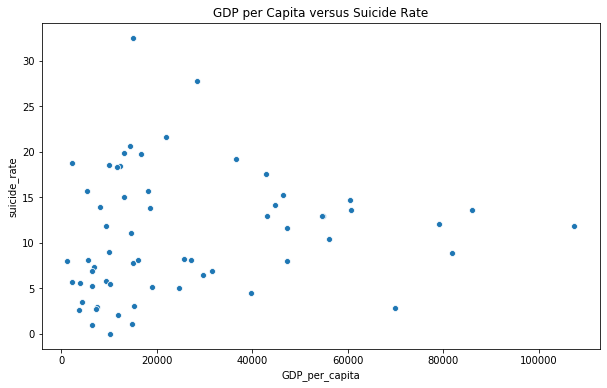

In [12]:
#Lets see if there is a correlation between suicide rate and GDP

pearsonr_GDP_per_capita = stats.pearsonr(suicides_2015_modified['suicide_rate'], suicides_2015_modified['GDP_per_capita'])
print("The correlation coefficient between suicide rate and GDP per capita is {}".format(pearsonr_GDP_per_capita))
plt.figure(figsize = (10,6))
GDP_plot = sns.scatterplot(x="GDP_per_capita", y="suicide_rate", data=suicides_2015_modified)
plt.title("GDP per Capita versus Suicide Rate")

In [21]:
#we need to manipulate the dataframe to get overall suicide rate and GDP and GDP per capita for
#drop rows we don't need
suicides_overall = suicide_frame_clean.drop(['year', 'age', 'sex', 'suicides/100k pop', 'country-year'], axis = 1)
suicides_overall.head(10)

,country,suicides_no,population,gdp_for_year ($),gdp_per_capita ($)
0,Albania,21,312900,"2,156,624,900",796
1,Albania,16,308000,"2,156,624,900",796
2,Albania,14,289700,"2,156,624,900",796
3,Albania,1,21800,"2,156,624,900",796
4,Albania,9,274300,"2,156,624,900",796
5,Albania,1,35600,"2,156,624,900",796
6,Albania,6,278800,"2,156,624,900",796
7,Albania,4,257200,"2,156,624,900",796
8,Albania,1,137500,"2,156,624,900",796
9,Albania,0,311000,"2,156,624,900",796


In [22]:
suicide_no_overall = suicides_overall.groupby('country')['suicides_no'].sum()
print(suicide_no_overall.head()) #get total suicides per country
population_overall = suicides_overall.groupby('country')['population'].sum()
print(population_overall.head()) #get total population per country

country
Albania                 1970
Antigua and Barbuda       11
Argentina              82219
Armenia                 1838
Aruba                    101
Name: suicides_no, dtype: int64
country
Albania                  62325467
Antigua and Barbuda       1990228
Argentina              1035985431
Armenia                  74948140
Aruba                     1259677
Name: population, dtype: int64


In [23]:
#get the GDP per country
gdps2 = suicides_overall.groupby('country')[' gdp_for_year ($) '].max()
gdps_numeric2 = gdps2.apply(lambda x: x.replace(",",""))
gdps_numeric_new2=pd.to_numeric(gdps_numeric2)
print(gdps_numeric_new2.head())

country
Albania                 8992642349
Antigua and Barbuda      919577148
Argentina              97724004252
Armenia                 9260284938
Aruba                   2791960894
Name:  gdp_for_year ($) , dtype: int64


In [24]:
#build modified data frame
suicides_overall_modified = pd.merge( suicide_no_overall, population_overall, on='country')
suicides_overall_modified = suicides_overall_modified.assign(suicide_rate = (suicides_overall_modified.suicides_no/suicides_overall_modified.population)*100000)
suicides_overall_modified = pd.merge(suicides_overall_modified, gdps_numeric_new2, on='country')
suicides_overall_modified = suicides_overall_modified.rename(columns={' gdp_for_year ($) ':'GDP'})
suicides_overall_modified = suicides_overall_modified.assign(GDP_per_capita = (suicides_overall_modified.GDP/suicides_overall_modified.population))
print(suicides_overall_modified.head(10))

                     suicides_no  population  suicide_rate           GDP  \
country                                                                    
Albania                     1970    62325467      3.160827    8992642349   
Antigua and Barbuda           11     1990228      0.552700     919577148   
Argentina                  82219  1035985431      7.936309   97724004252   
Armenia                     1838    74948140      2.452362    9260284938   
Aruba                        101     1259677      8.017928    2791960894   
Australia                  70111   542377786     12.926599  926448240318   
Austria                    48872   236368465     20.676193   99036165210   
Azerbaijan                  1656   111790300      1.481345    8858006036   
Bahamas                       93     6557048      1.418321    9981960000   
Bahrain                      463    16753926      2.763531    9632155053   

                     GDP_per_capita  
country                              
Albania    

The correlation coefficient between suicide rate and GDP is (0.11235317991753939, 0.26573665029374605)


Text(0.5, 1.0, 'GDP versus Suicide Rate')

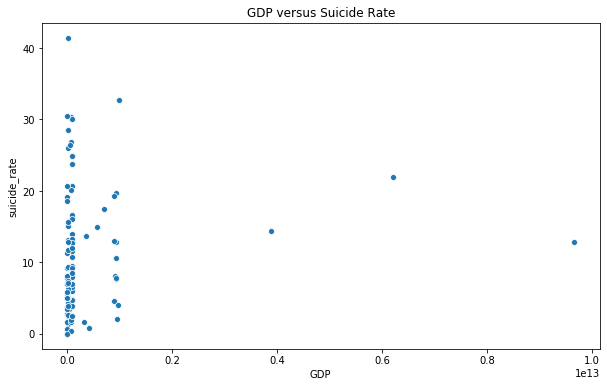

In [25]:
#Lets see if there is a correlation between suicide rate and GDP

pearsonr_GDP_overall = stats.pearsonr(suicides_overall_modified['suicide_rate'], suicides_overall_modified['GDP'])
print("The correlation coefficient between suicide rate and GDP is {}".format(pearsonr_GDP_overall))
plt.figure(figsize = (10,6))
GDP_plot_overall = sns.scatterplot(x="GDP", y="suicide_rate", data=suicides_overall_modified)
plt.title("GDP versus Suicide Rate")

The correlation coefficient between suicide rate and GDP per capita is (-0.1511759921222902, 0.13325298867793572)


Text(0.5, 1.0, 'GDP per Capita versus Suicide Rate')

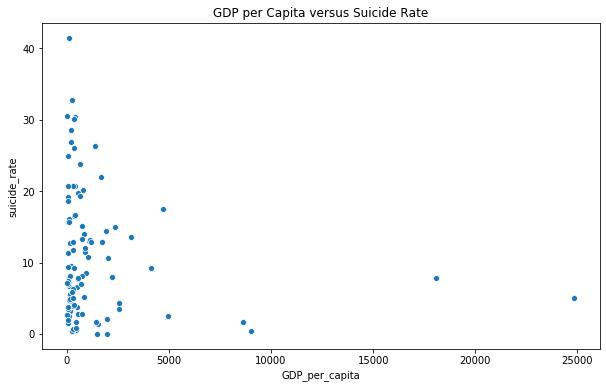

In [26]:
#Lets see if there is a correlation between suicide rate and GDP

pearsonr_GDP_per_capita_overall = stats.pearsonr(suicides_overall_modified['suicide_rate'], suicides_overall_modified['GDP_per_capita'])
print("The correlation coefficient between suicide rate and GDP per capita is {}".format(pearsonr_GDP_per_capita_overall))
plt.figure(figsize = (10,6))
GDP_plot_overall2 = sns.scatterplot(x="GDP_per_capita", y="suicide_rate", data=suicides_overall_modified)
plt.title("GDP per Capita versus Suicide Rate")